# Modelling Sections

**Tools selection**

- Stemming
- Lemmatization

- TFIDFvectorizer 
- Dictvectorizer 
- Countvectorizer
    - logistic regression
    - randomforest
    - Adaboostclassifier
    - Multinomial nb
    - Bernoulli nb


## Define Class

In [1]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]


In [2]:
class StemTokenize(object):
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, articles):
        return [self.ps.stem(t) for t in word_tokenize(articles)]


## Define functions

In [3]:
def featurize(text,option = 1):
    '''Create dictiondary which add up text length into splitted text
    Parameter : token_lst = text each document'''
    #tokenized
    tokenizer =  RegexpTokenizer(pattern='\w+')
    token_list = list(tokenizer.tokenize(text.lower()))
    # remove stopword
    token_list = [token for token in token_list if token not in  stopwords.words('english')]
    # option 1
    if option == 1:
        features = {}
        for token in token_list:
            try :
                features[token]+=1 
            except :
                features[token]=1
    # option 2
    elif option == 3:
        features = {}
        for token in token_list:
            features[token]=1
    # option 3
    elif option == 2:
        features = {}
        for token in token_list:
            try :
                features[token]+=1 
            except :
                features[token]=1
            
        #   word count
        features['word_count'] = len(token_list)
    
        #   sentiment score
        sent = SentimentIntensityAnalyzer()
        score = sent.polarity_scores(text)['compound']
        # convert to classes
        if score >= 0.0:
            features['sentiment'] = 1
        elif score < 0.0:
            features['sentiment'] = 0 
            
        #   punctuation count
        punctuations='!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~'
        hv_punc = {}
        for i in punctuations:
            hv_punc[str(i)+' count']=text.count(i)
        features['punc_count'] = sum(hv_punc.values())
        
        
            
    return features

In [4]:
def featurize_l(text,option = 1):
    '''Create dictiondary which add up text length into splitted text
    Parameter : token_lst = text each document'''
    # Instantiate 
    tokenizer =  RegexpTokenizer(pattern='\w+')
    lemma = WordNetLemmatizer()
    
    #tokenized
    token_list = list(tokenizer.tokenize(text.lower()))
    # remove stopword
    token_list = [token for token in token_list if token not in  stopwords.words('english')]
#     add lemma step
    token_list = [lemma.lemmatize(t) for t in token_list]
    
    # option 1
    if option == 1:
        features = {}
        for token in token_list:
            try :
                features[token]+=1 
            except :
                features[token]=1
    # option 2
    elif option == 3:
        features = {}
        for token in token_list:
            features[token]=1
    # option 3
    elif option == 2:
        features = {}
        for token in token_list:
            try :
                features[token]+=1 
            except :
                features[token]=1
            
        #   word count
        features['word_count'] = len(token_list)
    
        #   sentiment score
        sent = SentimentIntensityAnalyzer()
        score = sent.polarity_scores(text)['compound']
        # convert to classes
        if score >= 0.0:
            features['sentiment'] = 1
        elif score < 0.0:
            features['sentiment'] = 0 
            
        #   punctuation count
        punctuations='!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~'
        hv_punc = {}
        for i in punctuations:
            hv_punc[str(i)+' count']=text.count(i)
        features['punc_count'] = sum(hv_punc.values())
        
        
            
    return features

In [5]:
def featurize_s(text,option = 1):
    '''Create dictiondary which add up text length into splitted text
    Parameter : token_lst = text each document'''
    # Instantiate 
    tokenizer =  RegexpTokenizer(pattern='\w+')
    p_stem = PorterStemmer()
    
    #tokenized
    token_list = list(tokenizer.tokenize(text.lower()))
    # remove stopword
    token_list = [token for token in token_list if token not in  stopwords.words('english')]
    #   add stem step
    token_list = [p_stem.stem(t) for t in token_list]
    
    # option 1
    if option == 1:
        features = {}
        for token in token_list:
            try :
                features[token]+=1 
            except :
                features[token]=1
    # option 2
    elif option == 3:
        features = {}
        for token in token_list:
            features[token]=1
    # option 3
    elif option == 2:
        features = {}
        for token in token_list:
            try :
                features[token]+=1 
            except :
                features[token]=1
            
        #   word count
        features['word_count'] = len(token_list)
    
        #   sentiment score
        sent = SentimentIntensityAnalyzer()
        score = sent.polarity_scores(text)['compound']
        # convert to classes
        if score >= 0.0:
            features['sentiment'] = 1
        elif score < 0.0:
            features['sentiment'] = 0 
            
        #   punctuation count
        punctuations='!\"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~'
        hv_punc = {}
        for i in punctuations:
            hv_punc[str(i)+' count']=text.count(i)
        features['punc_count'] = sum(hv_punc.values())
        
        
            
    return features

In [6]:
def report(X_train,X_test,y_train,y_test,*argv,gridsearch=False):
    '''Show the classification report each model
    
    Parameter : X_test = test data of X
                y_test = test data of y
                argv = prediction of y values in each model
                
    Return : Classification report of each model'''
    # if gridsearch model used 
    if gridsearch == True:
        for j in (argv):
            pred = j.predict(X_test)
            print(f'Model : {j.estimator[1]}\n\n')
            print(f'Train Score:{j.score(X_train,y_train)}\n')
            print(f'Test  Score:{j.score(X_test,y_test)}\n\n')
            print(f'Model best parameters : {j.best_params_}\n\n classification report: \n{classification_report(y_test,pred)}\n')
            print('\n------------------------------------------------------------------------')
    
    elif gridsearch == False:
        for j in (argv):
            pred = j.predict(X_test)
            print(f'Model : {j}\n\n')
            print(f'Train Score:{j.score(X_train,y_train)}\n')
            print(f'Test  Score:{j.score(X_test,y_test)}\n\n')
            print(f'Model classification report: \n{classification_report(y_test,pred)}\n')
            print('\n------------------------------------------------------------------------')
    

# Import Data & Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import time
import pickle

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
import re


In [8]:
df = pd.read_csv('../data/df_cleaned.csv')

In [9]:
# Check shape
df.shape

(1863, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1863 non-null   object
 1   selftext         1863 non-null   object
 2   subreddit        1863 non-null   object
 3   text             1863 non-null   object
 4   text_length      1863 non-null   int64 
 5   text_word_count  1863 non-null   int64 
 6   token_\w+_count  1863 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 102.0+ KB


In [11]:
df["text"] = df["text"].str.lower().map(lambda x: re.sub("depression", "", x))
df["text"] = df["text"].str.lower().map(lambda x: re.sub("depressed", "", x))

In [12]:
df['subreddit'] = df['subreddit'].map({"depression":1,
                                       "offmychest":0})

## Train-test split

In [13]:
X = df['text']
y = df['subreddit']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 stratify=y)

In [15]:
# Check shape each set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1397,), (466,), (1397,), (466,))

In [16]:
cvec= CountVectorizer()
X_cvec = cvec.fit_transform(X_train)

In [17]:
# Check y_test classes weight
y_test.value_counts(normalize=True).mul(100).round(2)

1    52.36
0    47.64
Name: subreddit, dtype: float64

In [18]:
# Check y_train classes weight

y_train.value_counts(normalize=True).mul(100).round(2)

# seem balanced

1    52.33
0    47.67
Name: subreddit, dtype: float64

# Baseline model

In [21]:
pipe = Pipeline([('cvec',CountVectorizer(stop_words="english")),
                    ('logreg',LogisticRegression(penalty='none'))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('logreg', LogisticRegression(penalty='none'))])

In [22]:
report(X_train, X_test, y_train, y_test, pipe)

Model : Pipeline(steps=[('cvec', CountVectorizer(stop_words='english')),
                ('logreg', LogisticRegression(penalty='none'))])


Train Score:0.9985683607730852

Test  Score:0.7081545064377682


Model classification report: 
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       222
           1       0.73      0.69      0.71       244

    accuracy                           0.71       466
   macro avg       0.71      0.71      0.71       466
weighted avg       0.71      0.71      0.71       466



------------------------------------------------------------------------


In [23]:
# coefficient plotting

logreg_coef = pd.DataFrame(pipe.named_steps.logreg.coef_, columns = pipe[:-1].get_feature_names_out()).T.sort_values(by=0,ascending=False)

In [24]:
# Create new column to by specify color to value of the coefficient, if positive will be blue
logreg_coef['color_list'] = ['mediumblue' if x >= 0 else 'darkorange' for x in logreg_coef[0].values]
# take absolute of all the values, and reverse. To get only first 20 highest values.
top_20 = [i for i in abs(logreg_coef[0]).sort_values(ascending=False).index[:20][::-1]]

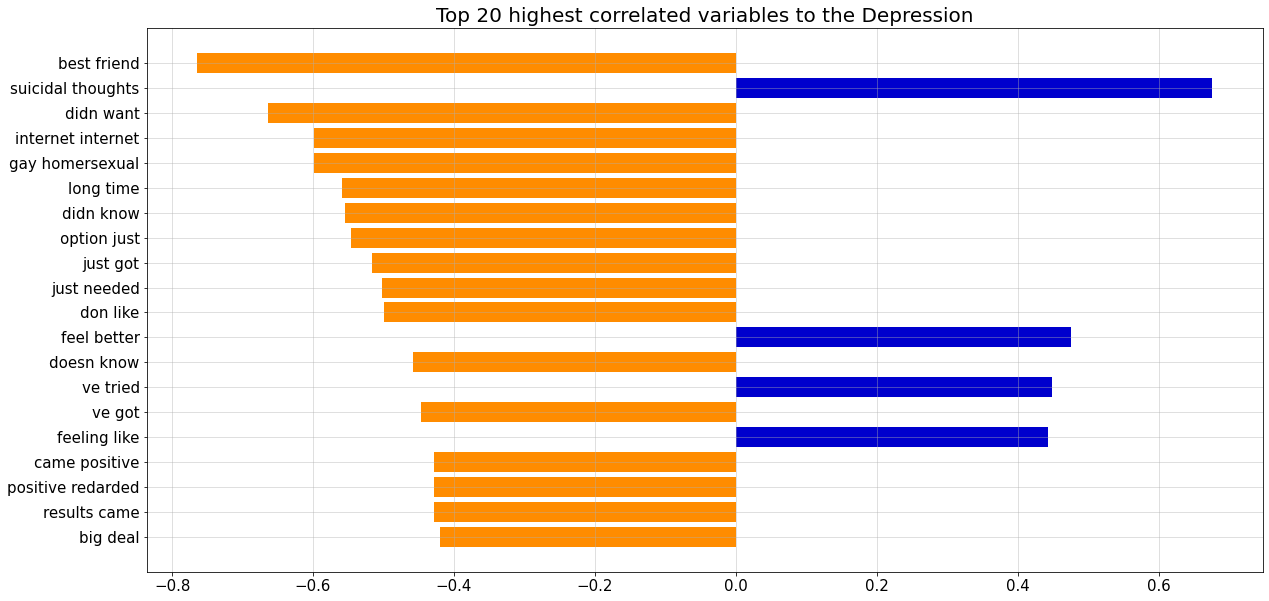

In [25]:
pipe = Pipeline([('cvec',CountVectorizer(ngram_range=(2,2),stop_words='english')),('logreg',LogisticRegression())])
pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
# coefficient plotting

logreg_coef = pd.DataFrame(pipe.named_steps.logreg.coef_, columns = pipe[:-1].get_feature_names_out()).T.sort_values(by=0,ascending=False)
# Create new column to by specify color to value of the coefficient, if positive will be blue
logreg_coef['color_list'] = ['mediumblue' if x >= 0 else 'darkorange' for x in logreg_coef[0].values]
# take absolute of all the values, and reverse. To get only first 20 highest values.
top_20 = [i for i in abs(logreg_coef[0]).sort_values(ascending=False).index[:20][::-1]]
plt.figure(figsize=(20,10))
plt.barh(logreg_coef[0].loc[top_20].index,\
         logreg_coef[0].loc[top_20],\
         color=logreg_coef.loc[top_20]['color_list'])
plt.title('Top 20 highest correlated variables to the Depression',size=20)
plt.yticks(fontsize=15);
plt.xticks(fontsize=15)
plt.grid(alpha = 0.5)

## Countvectorizer

In [26]:
# list 
acc,pre,recall,f1,tn,fp,fn,tp,name_model =  [],[],[],[],[],[],[],[],[]


# model
model = [LogisticRegression(penalty='none'),
         RandomForestClassifier(),
         AdaBoostClassifier(),MultinomialNB()]


t0 = time.time()
for mod in model:
    pipe = Pipeline([('cvec',CountVectorizer()),('est',mod)])
    param = { 'cvec__stop_words':['english'],
    'cvec__ngram_range':[(1,2),(2,2)],
    'cvec__max_df':[1.,.98],
    'cvec__min_df':[1,2],
    'cvec__max_features':[500,700,1200,1500]}
    gs = GridSearchCV(pipe,param_grid=param,cv=3,verbose=1)
    #fit
    gs.fit(X_train,y_train)
    #pred
    pred = gs.predict(X_test)
    
    report(X_train,X_test,y_train,y_test,gs,gridsearch=True)
    #score
    acc.append(metrics.accuracy_score(y_test,pred))
    pre.append(metrics.precision_score(y_test,pred))
    recall.append(metrics.recall_score(y_test,pred))
    f1.append(metrics.f1_score(y_test,pred))
    name_model.append(mod)
    #confusion matrix
    tn.append(confusion_matrix(y_test,pred)[0][0])
    fp.append(confusion_matrix(y_test,pred)[0][1])
    fn.append(confusion_matrix(y_test,pred)[1][0])
    tp.append(confusion_matrix(y_test,pred)[1][1])
    
    
    print('finish\n')
result_cvec =pd.DataFrame(data = [acc,pre,recall,f1,tn,fp,fn,tp,name_model],\
             index = ['accuracy','precision','recall','f1_score','tn','fp','fn','tp','name_model'])
print(f'\nIt\'s take :{time.time()-t0} seconds')
    

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Model : LogisticRegression(penalty='none')


Train Score:0.9985683607730852

Test  Score:0.6888412017167382


Model best parameters : {'cvec__max_df': 1.0, 'cvec__max_features': 1500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english'}

 classification report: 
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       222
           1       0.69      0.73      0.71       244

    accuracy                           0.69       466
   macro avg       0.69      0.69      0.69       466
weighted avg       0.69      0.69      0.69       466



------------------------------------------------------------------------
finish

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Model : RandomForestClassifier()


Train Score:0.9971367215461704

Test  Score:0.6952789699570815


Model best parameters : {'cvec__max_df': 0.98, 'cvec__max_features': 500, 'cvec

In [27]:
result_cvec.T

,accuracy,precision,recall,f1_score,tn,fp,fn,tp,name_model
0,0.688841,0.692607,0.729508,0.710579,143,79,66,178,LogisticRegression(penalty='none')
1,0.695279,0.717949,0.688525,0.702929,156,66,76,168,RandomForestClassifier()
2,0.671674,0.673004,0.72541,0.698225,136,86,67,177,AdaBoostClassifier()
3,0.766094,0.747253,0.836066,0.789168,153,69,40,204,MultinomialNB()


In [28]:
result_cvec.T['recall'].max()

0.8360655737704918

## TFIDFvectorizer

In [29]:
# list 
acc,pre,recall,f1,tn,fp,fn,tp,name_model =  [],[],[],[],[],[],[],[],[]


# model
model = [LogisticRegression(penalty='none'),
         RandomForestClassifier(),
         AdaBoostClassifier(),
         MultinomialNB()]

t0 = time.time()
for mod in model:
    pipe = Pipeline([('tf',TfidfVectorizer()),('est',mod)])
    param = { 'tf__stop_words':['english'],
    'tf__ngram_range':[(1,2),(2,2)],
    'tf__max_df':[1.,.98],
    'tf__min_df':[1,2],
    'tf__max_features':[500,700,1200,1500]}
    gs = GridSearchCV(pipe,param_grid=param,cv=3,verbose=1)
    # fit
    gs.fit(X_train,y_train)
    
    # prediction
    pred = gs.predict(X_test)
    report(X_train,X_test,y_train,y_test,gs,gridsearch=True)
    
    #score
    acc.append(metrics.accuracy_score(y_test,pred))
    pre.append(metrics.precision_score(y_test,pred))
    recall.append(metrics.recall_score(y_test,pred))
    f1.append(metrics.f1_score(y_test,pred))
    name_model.append(mod)
    #confusion matrix
    tn.append(confusion_matrix(y_test,pred)[0][0])
    fp.append(confusion_matrix(y_test,pred)[0][1])
    fn.append(confusion_matrix(y_test,pred)[1][0])
    tp.append(confusion_matrix(y_test,pred)[1][1])
    
    
    print('finish\n')
result_tf =pd.DataFrame(data = [acc,pre,recall,f1,tn,fp,fn,tp,name_model],\
             index = ['accuracy','precision','recall','f1_score','tn','fp','fn','tp','name_model'])
print(f'\nIt\'s take :{time.time()-t0} seconds')


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Model : LogisticRegression(penalty='none')


Train Score:0.9985683607730852

Test  Score:0.6824034334763949


Model best parameters : {'tf__max_df': 1.0, 'tf__max_features': 1500, 'tf__min_df': 2, 'tf__ngram_range': (1, 2), 'tf__stop_words': 'english'}

 classification report: 
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       222
           1       0.71      0.67      0.69       244

    accuracy                           0.68       466
   macro avg       0.68      0.68      0.68       466
weighted avg       0.68      0.68      0.68       466



------------------------------------------------------------------------
finish

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Model : RandomForestClassifier()


Train Score:0.9985683607730852

Test  Score:0.7124463519313304


Model best parameters : {'tf__max_df': 0.98, 'tf__max_features': 1500, 'tf__min_df': 2, '

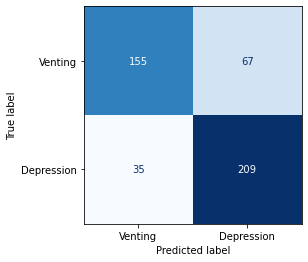

In [30]:
plot_confusion_matrix(gs,X_test,y_test,display_labels=['Venting', 'Depression'],colorbar=False,cmap=plt.cm.Blues)

In [31]:
result_tf.T

,accuracy,precision,recall,f1_score,tn,fp,fn,tp,name_model
0,0.682403,0.706897,0.672131,0.689076,154,68,80,164,LogisticRegression(penalty='none')
1,0.712446,0.714844,0.75,0.732,149,73,61,183,RandomForestClassifier()
2,0.665236,0.677419,0.688525,0.682927,142,80,76,168,AdaBoostClassifier()
3,0.781116,0.757246,0.856557,0.803846,155,67,35,209,MultinomialNB()


In [32]:
result_tf.T['recall'].max()

0.8565573770491803

## Dict vectorizer 

- **Dictvectorizer section will contain these models:**
    - Dictvectorizer count by add up duplicate text (5 Model)
    - Dicvectorizer count by uniqe text (5 Model + Bernoullinb)
    - Dicvectorizer add features created

In [33]:
acc,pre,recall,f1,tn,fp,fn,tp,name_model =  [],[],[],[],[],[],[],[],[]


model = [LogisticRegression(penalty='none'),
         RandomForestClassifier(),
         AdaBoostClassifier(),
         MultinomialNB(),
         BernoulliNB()]


for feature in range(1,4):
    df['selftext_add_length'] = df['text'].apply(lambda x : featurize(x,option = feature))
    X = df['selftext_add_length']
    y = df['subreddit']

    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)
    
    if feature == 3 :
        for mod in model:
            pipe = Pipeline([('dic',DictVectorizer(sparse=True)),('mod',mod)])
            pipe.fit(X_train,y_train)
            pred = pipe.predict(X_test)
            report(X_train,X_test,y_train,y_test,pipe)
            
            acc.append(metrics.accuracy_score(y_test,pred))
            pre.append(metrics.precision_score(y_test,pred))
            recall.append(metrics.recall_score(y_test,pred))
            f1.append(metrics.f1_score(y_test,pred))
            tn.append(confusion_matrix(y_test,pred)[0][0])
            fp.append(confusion_matrix(y_test,pred)[0][1])
            fn.append(confusion_matrix(y_test,pred)[1][0])
            tp.append(confusion_matrix(y_test,pred)[1][1])
            name_model.append(mod)
            
    elif feature < 3:
        for mod in (model[:-1]):
            pipe = Pipeline([('dic',DictVectorizer(sparse=True)),('mod',mod)])
            pipe.fit(X_train,y_train)
            pred = pipe.predict(X_test)
            report(X_train,X_test,y_train,y_test,pipe)
            
            
            acc.append(metrics.accuracy_score(y_test,pred))
            pre.append(metrics.precision_score(y_test,pred))
            recall.append(metrics.recall_score(y_test,pred))
            f1.append(metrics.f1_score(y_test,pred))
            tn.append(confusion_matrix(y_test,pred)[0][0])
            fp.append(confusion_matrix(y_test,pred)[0][1])
            fn.append(confusion_matrix(y_test,pred)[1][0])
            tp.append(confusion_matrix(y_test,pred)[1][1])
            name_model.append(mod)
    print(f'\n\n\n -------------------------- Finish model part {feature}--------------------------\n\n\n ')

result_dict =pd.DataFrame(data = [acc,pre,recall,f1,tn,fp,fn,tp,name_model],\
             index = ['accuracy','precision','recall','f1_score','tn','fp','fn','tp','name_model'])


Model : Pipeline(steps=[('dic', DictVectorizer()),
                ('mod', LogisticRegression(penalty='none'))])


Train Score:0.9985683607730852

Test  Score:0.7167381974248928


Model classification report: 
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       222
           1       0.73      0.72      0.73       244

    accuracy                           0.72       466
   macro avg       0.72      0.72      0.72       466
weighted avg       0.72      0.72      0.72       466



------------------------------------------------------------------------
Model : Pipeline(steps=[('dic', DictVectorizer()), ('mod', RandomForestClassifier())])


Train Score:0.9985683607730852

Test  Score:0.6824034334763949


Model classification report: 
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       222
           1       0.69      0.70      0.70       244

    accuracy                           0

Text(0.5, 1.0, '')

<Figure size 1200x800 with 0 Axes>

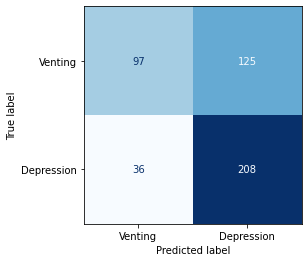

In [34]:
# Show the confusion matrix of the best model
plt.figure(dpi=200)
plot_confusion_matrix(pipe,X_test,y_test,display_labels=['Venting', 'Depression'],\
                      colorbar=False,cmap=plt.cm.Blues)
plt.title('')

In [35]:
result_dict.T

,accuracy,precision,recall,f1_score,tn,fp,fn,tp,name_model
0,0.716738,0.733333,0.721311,0.727273,158,64,68,176,LogisticRegression(penalty='none')
1,0.682403,0.693548,0.704918,0.699187,146,76,72,172,"(DecisionTreeClassifier(max_features='sqrt', r..."
2,0.67382,0.67037,0.741803,0.70428,133,89,63,181,"(DecisionTreeClassifier(max_depth=1, random_st..."
3,0.77897,0.778656,0.807377,0.792757,166,56,47,197,MultinomialNB()
4,0.716738,0.733333,0.721311,0.727273,158,64,68,176,LogisticRegression(penalty='none')
5,0.684549,0.685824,0.733607,0.708911,140,82,65,179,"(DecisionTreeClassifier(max_features='sqrt', r..."
6,0.660944,0.666667,0.704918,0.685259,136,86,72,172,"(DecisionTreeClassifier(max_depth=1, random_st..."
7,0.781116,0.78629,0.79918,0.792683,169,53,49,195,MultinomialNB()
8,0.699571,0.718487,0.70082,0.709544,155,67,73,171,LogisticRegression(penalty='none')
9,0.706009,0.700375,0.766393,0.731898,142,80,57,187,"(DecisionTreeClassifier(max_features='sqrt', r..."


In [36]:
result_dict.T['recall'].max()

0.8524590163934426

In [37]:
all_result = pd.concat([result_cvec.T,result_tf.T,result_dict.T],axis=0)

In [38]:
all_result.reset_index()
# Show Cvec (0-3) , TFID (4-7) , Dict op.1 (8-11), 
# Dict op.2 (12-15), Dict op.3 (16-20)

,index,accuracy,precision,recall,f1_score,tn,fp,fn,tp,name_model
0,0,0.688841,0.692607,0.729508,0.710579,143,79,66,178,LogisticRegression(penalty='none')
1,1,0.695279,0.717949,0.688525,0.702929,156,66,76,168,RandomForestClassifier()
2,2,0.671674,0.673004,0.72541,0.698225,136,86,67,177,AdaBoostClassifier()
3,3,0.766094,0.747253,0.836066,0.789168,153,69,40,204,MultinomialNB()
4,0,0.682403,0.706897,0.672131,0.689076,154,68,80,164,LogisticRegression(penalty='none')
5,1,0.712446,0.714844,0.75,0.732,149,73,61,183,RandomForestClassifier()
6,2,0.665236,0.677419,0.688525,0.682927,142,80,76,168,AdaBoostClassifier()
7,3,0.781116,0.757246,0.856557,0.803846,155,67,35,209,MultinomialNB()
8,0,0.716738,0.733333,0.721311,0.727273,158,64,68,176,LogisticRegression(penalty='none')
9,1,0.682403,0.693548,0.704918,0.699187,146,76,72,172,"(DecisionTreeClassifier(max_features='sqrt', r..."


In [39]:
all_result.reset_index().sort_values(by='recall',ascending=False)[:5]

,index,accuracy,precision,recall,f1_score,tn,fp,fn,tp,name_model
7,3,0.781116,0.757246,0.856557,0.803846,155,67,35,209,MultinomialNB()
20,12,0.654506,0.624625,0.852459,0.720971,97,125,36,208,BernoulliNB()
3,3,0.766094,0.747253,0.836066,0.789168,153,69,40,204,MultinomialNB()
11,3,0.77897,0.778656,0.807377,0.792757,166,56,47,197,MultinomialNB()
15,7,0.781116,0.78629,0.79918,0.792683,169,53,49,195,MultinomialNB()


- From the comparison of using 3 Vectorizer : Countvectorize, TFIDFvectorize, Dictvectorize, we have knowed that

**Top 5 models are using Multinomial nb, Bernoulli nb. Which are :** 
1. Tfidf with Multi
2. Dict op.3 with Bernoulli
3. Cvec with Multi
4. Dict op.1 with Multi
5. Dict op.2 with Multi

--- 

# Stemmatization / Lemmatization Testing

- FYI : The function called in this section are not yet formatted into the main function up above, so it might be messy and hard to read.  For the informative and cleaness results. Please skip this part and see the result from visualization at the end

## Stem + TFIDF + Multinomialnb

In [40]:
X = df['text']
y = df['subreddit']
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 stratify=y)

# add stemming to tokenizer
s__multi = Pipeline([('dic',TfidfVectorizer(tokenizer=StemTokenize())),('nb',MultinomialNB())])
s__multi.fit(X_train,y_train)
pred = s__multi.predict(X_test)


In [41]:
print(metrics.recall_score(y_test,pred))

0.8647540983606558


Model : Pipeline(steps=[('dic',
                 TfidfVectorizer(tokenizer=<__main__.StemTokenize object at 0x0000019177A79D00>)),
                ('nb', MultinomialNB())])


Train Score:0.8675733715103794

Test  Score:0.7703862660944206


Model classification report: 
              precision    recall  f1-score   support

           0       0.82      0.67      0.73       222
           1       0.74      0.86      0.80       244

    accuracy                           0.77       466
   macro avg       0.78      0.77      0.77       466
weighted avg       0.78      0.77      0.77       466



------------------------------------------------------------------------


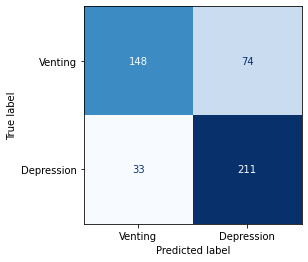

In [42]:
report(X_train,X_test,y_train,y_test,s__multi)
plot_confusion_matrix(s__multi,X_test,y_test,display_labels=['Venting', 'Depression'],colorbar=False,cmap=plt.cm.Blues)

## Lemma + TFIDF + Multinomialnb

In [43]:
X = df['text']
y = df['subreddit']
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 stratify=y)

# add lemmatization to tokenizer
l__multi = Pipeline([('dic',TfidfVectorizer(tokenizer=LemmaTokenizer())),('bnb',MultinomialNB())])
l__multi.fit(X_train,y_train)
pred = l__multi.predict(X_test)

In [44]:
print(metrics.recall_score(y_test,pred))

0.8483606557377049


Model : Pipeline(steps=[('dic',
                 TfidfVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x00000191010E2EB0>)),
                ('bnb', MultinomialNB())])


Train Score:0.8754473872584109

Test  Score:0.7703862660944206


Model classification report: 
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       222
           1       0.75      0.85      0.79       244

    accuracy                           0.77       466
   macro avg       0.78      0.77      0.77       466
weighted avg       0.77      0.77      0.77       466



------------------------------------------------------------------------


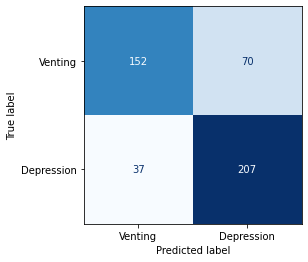

In [45]:
report(X_train,X_test,y_train,y_test,l__multi)
plot_confusion_matrix(l__multi,X_test,y_test,display_labels=['Venting', 'Depression'],colorbar=False,cmap=plt.cm.Blues)

---

#### This section show the visualization of comparison of best model from each section.
#### (Dataframe not include the stemming / lemmatization results.)

In [46]:
# keep top 5 recall value + baseline model 
val = all_result.sort_values(by='recall',ascending=False)['recall'][:5].tolist()
val.extend([0.76])

#### Recall score imporvement - from section vectorizer

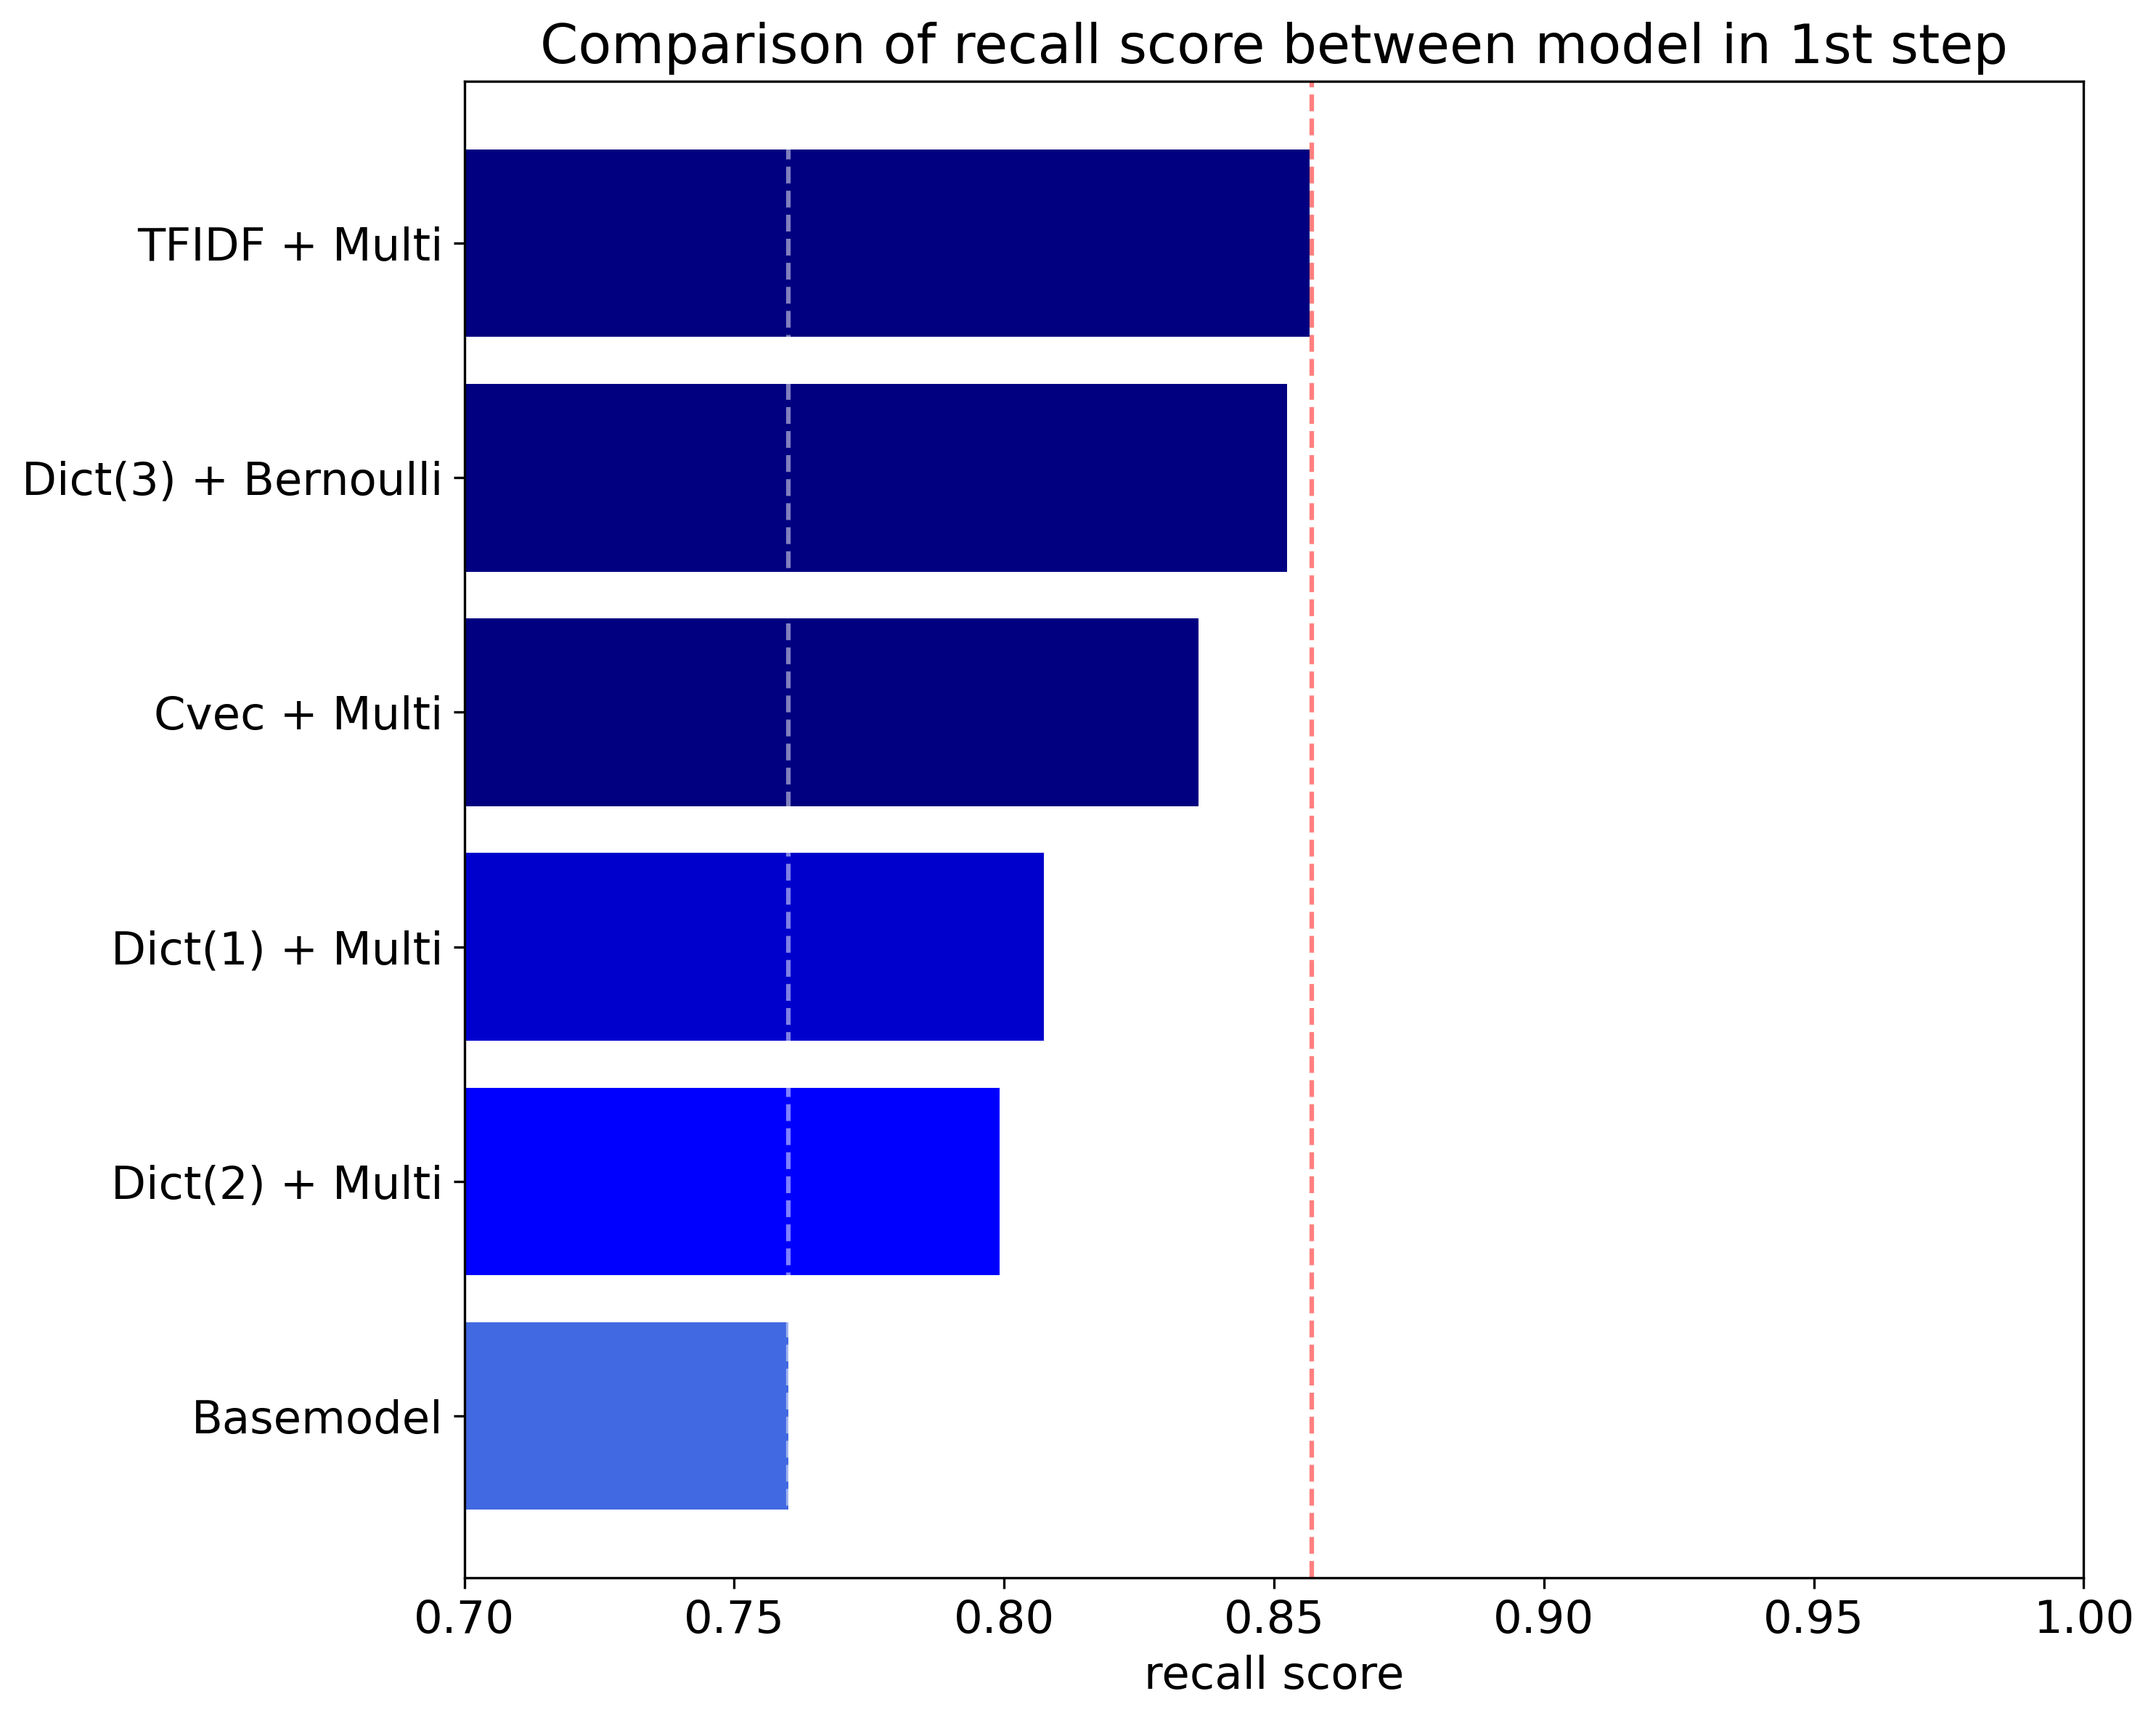

In [47]:
plt.figure(figsize=(10,8),dpi=300)
plt.barh(width= val[::-1],\
         y= ['TFIDF + Multi','Dict(3) + Bernoulli','Cvec + Multi',\
             'Dict(1) + Multi','Dict(2) + Multi','Basemodel'][::-1],
        color= ['navy','navy','navy','mediumblue','blue','royalblue'][::-1])


# baseline score
plt.axvline(0.76,color='white',alpha=0.5,linestyle = '--')
# Top recall score
plt.axvline(0.857,color='r',alpha=0.5,linestyle='--')
plt.xlim(0.7,1)
plt.title('Comparison of recall score between model in 1st step',size = 18)
plt.xticks(fontsize=15)
plt.xlabel('recall score',fontsize= 15)
plt.yticks(fontsize = 15)
plt.tight_layout()

#### The accuracy - from section vectorizer

In [48]:
# keep top 5 accuracy value + baseline model + baseline score for plot 

val_acc = all_result.sort_values(by='accuracy',ascending=False)['accuracy'][:5].tolist()
val_acc.extend([0.72,0.5])

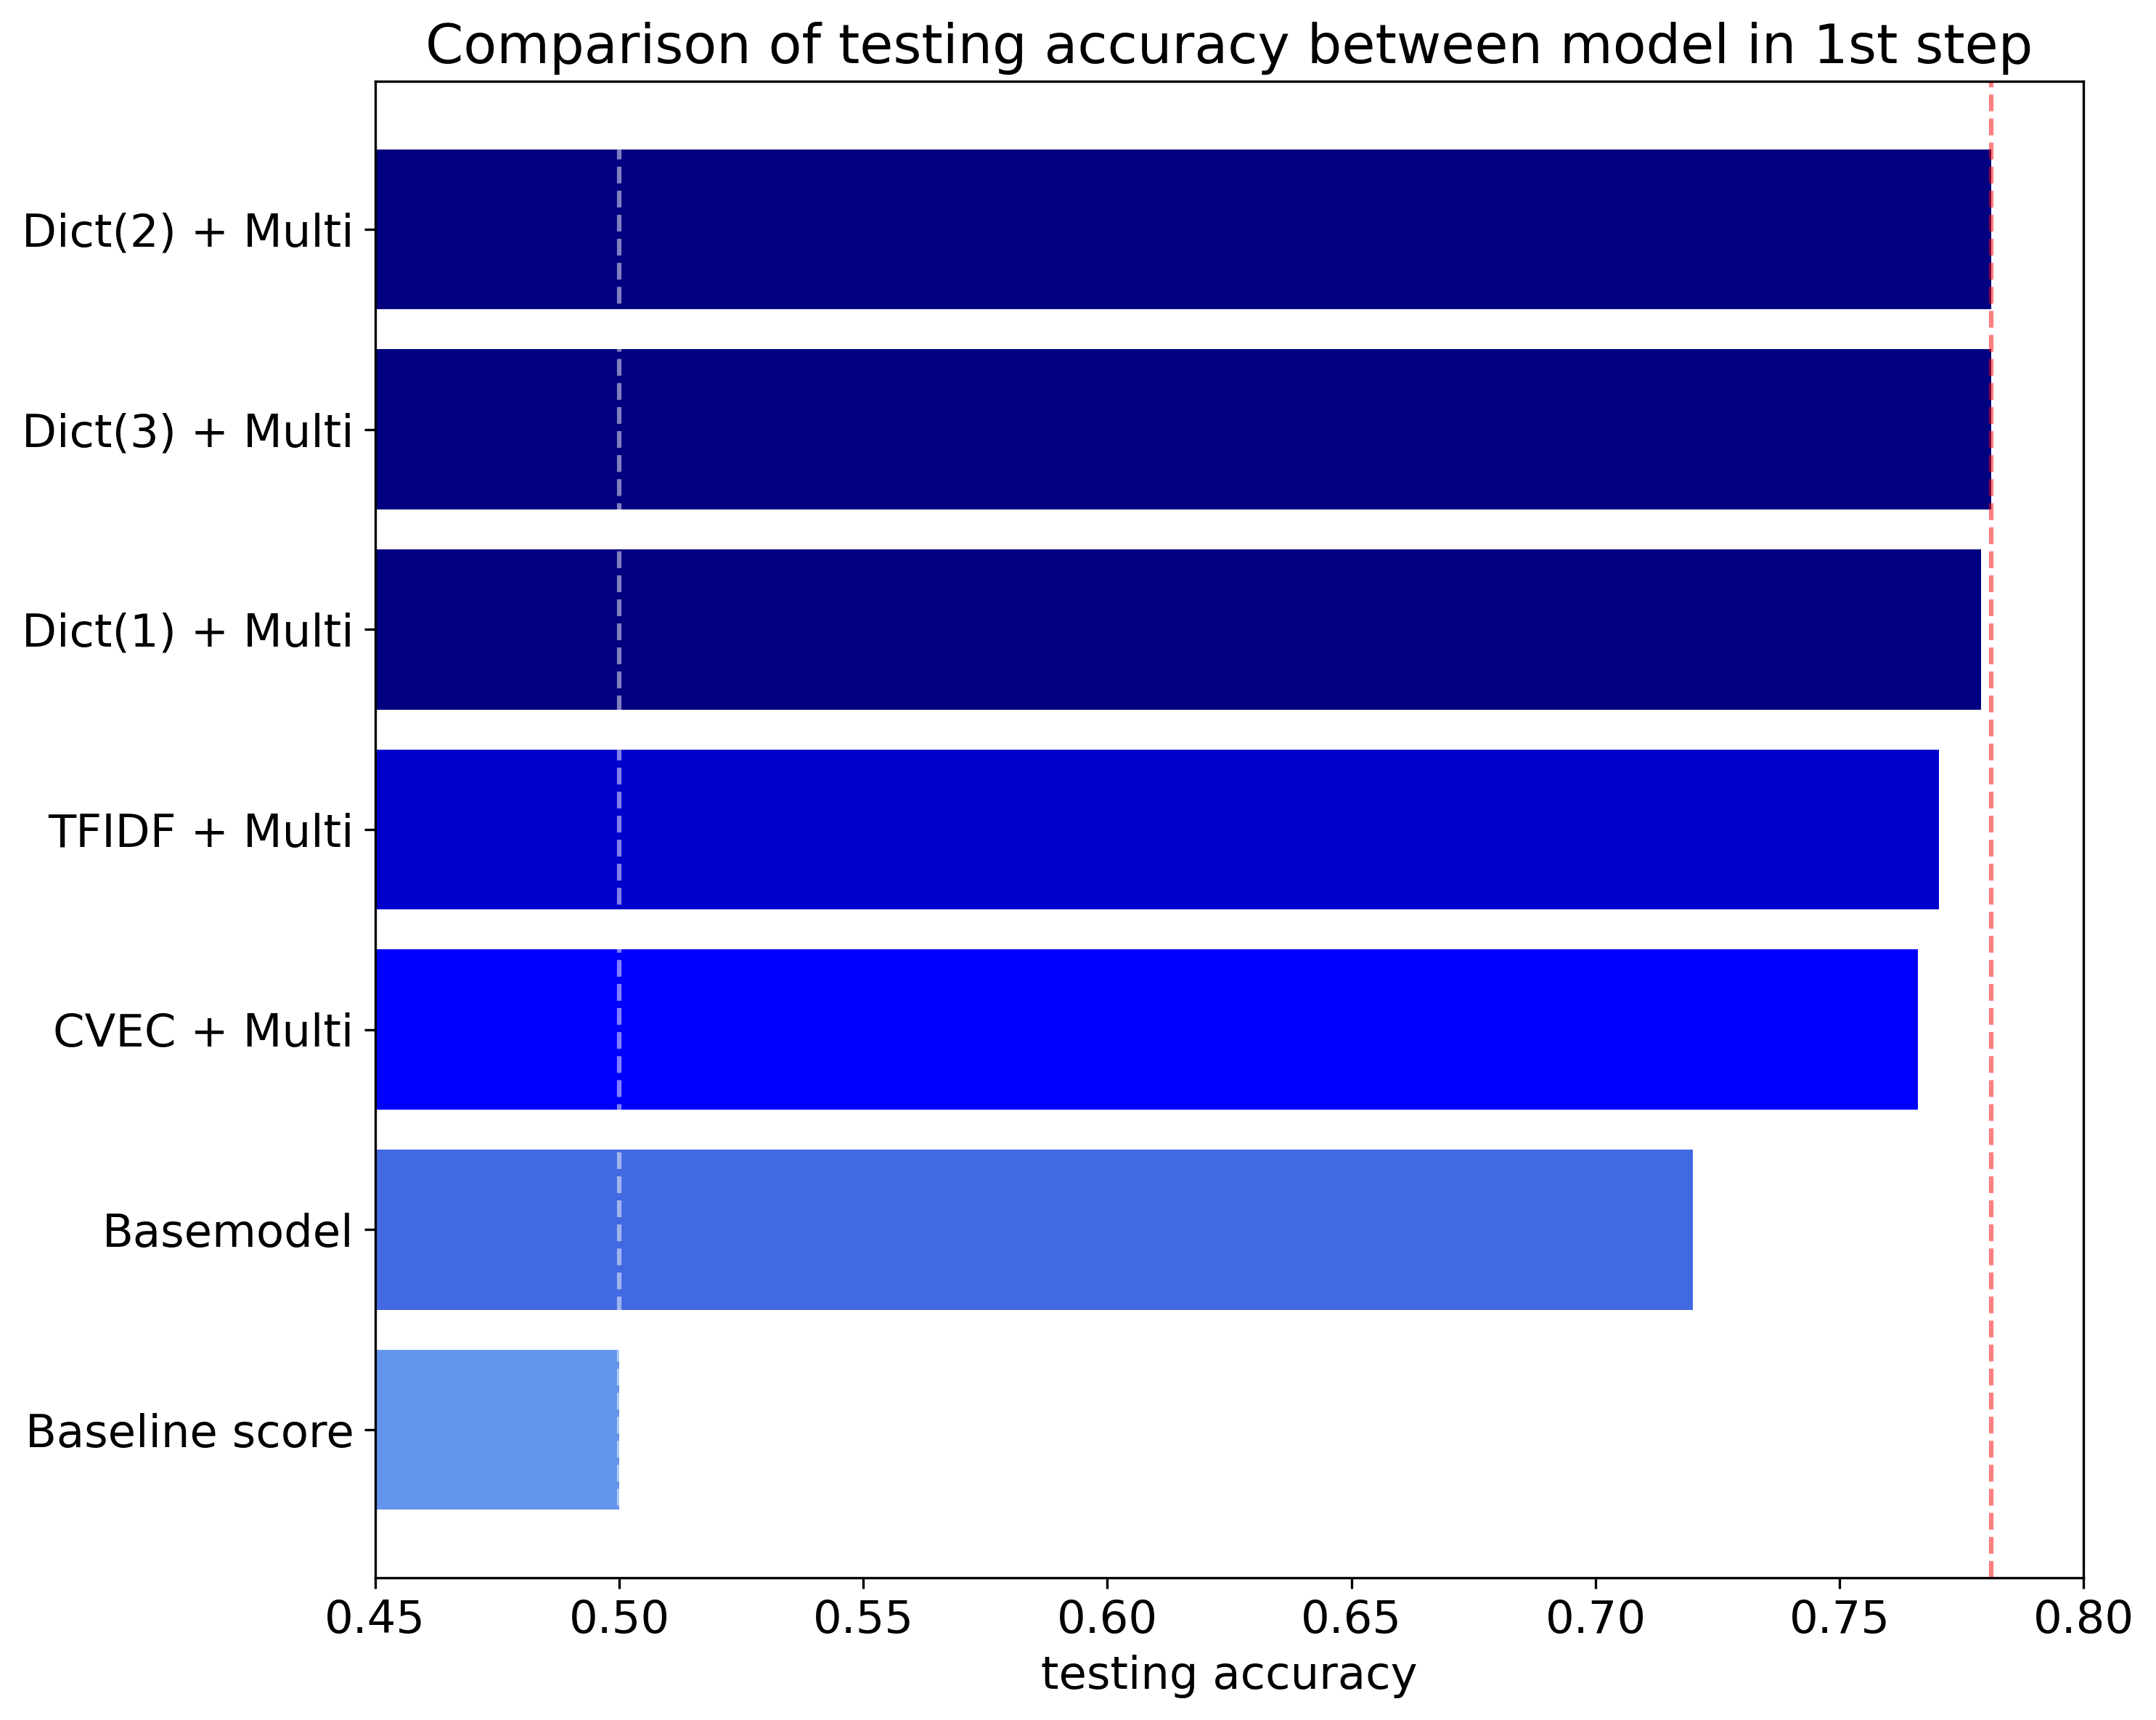

In [49]:
plt.figure(figsize=(10,8),dpi=300)
plt.barh(width= val_acc[::-1],\
         y= ['Dict(2) + Multi','Dict(3) + Multi','Dict(1) + Multi',
             'TFIDF + Multi','CVEC + Multi','Basemodel','Baseline score'][::-1],
        color= ['navy','navy','navy','mediumblue','blue','royalblue','cornflowerblue'][::-1])


# baseline score
plt.axvline(0.5,color='white',alpha=0.5,linestyle = '--')
# Top recall score
plt.axvline(0.781,color='r',alpha=0.5,linestyle='--')
plt.xlim(0.45,0.8)
plt.title('Comparison of testing accuracy between model in 1st step',size = 18)
plt.xticks(fontsize=15)
plt.xlabel('testing accuracy',fontsize= 15)
plt.yticks(fontsize = 15)
plt.tight_layout()

- Top 5 accuracy order is different from recall score, since there are an overfitting occur, even the predicted correctof the venting person tend to increase but we're focusing the to reduce the number of false negative as much as we can . So, we give up accuracy at this point.

#### Recall score on preprocessor section

In [50]:
Recall_score = [0.8525,0.8483606557377049,0.8647540983606558]
Preprocess =  ['normal','+lemma','+stem']

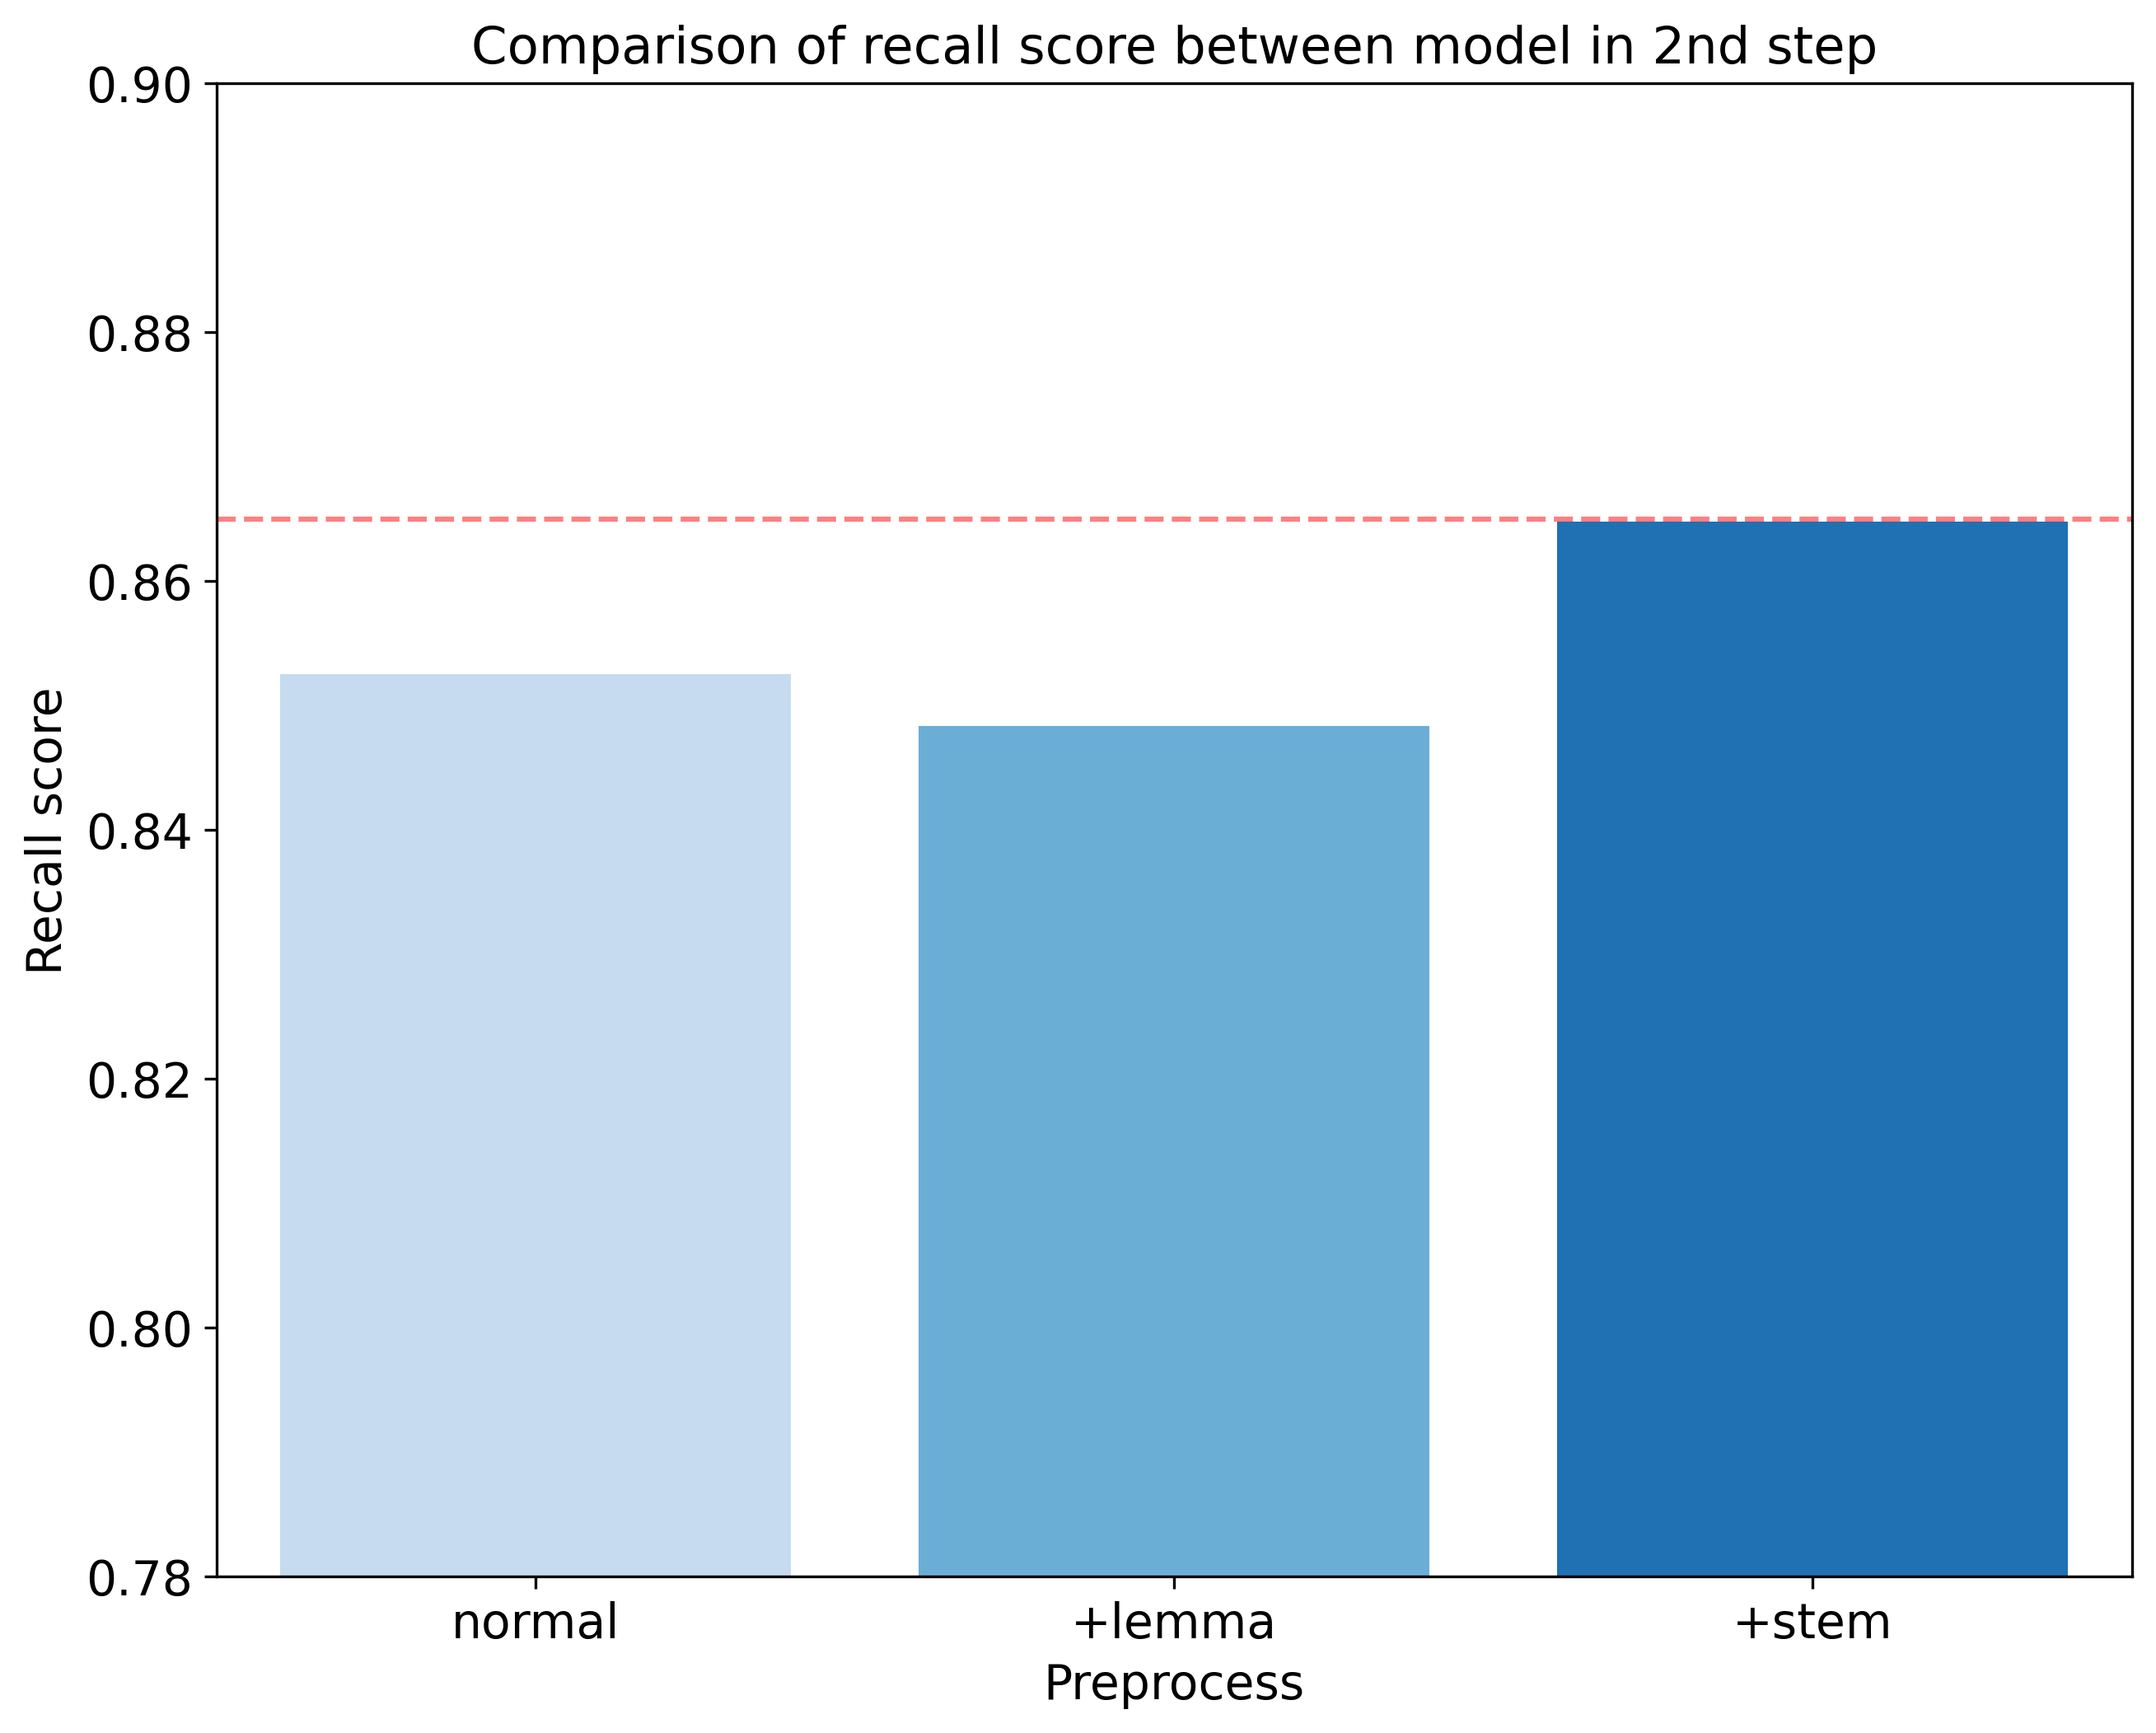

In [51]:
plt.figure(figsize=(10,8),dpi=300)
sns.barplot(x=Preprocess,y=Recall_score,palette='Blues',saturation=1)

plt.axhline(0.865,linestyle= '--' ,color = 'r', alpha= 0.5)
plt.ylim(0.78,0.9)
plt.title('Comparison of recall score between model in 2nd step',size= 15)
plt.xticks(fontsize=14)
plt.xlabel('Preprocess',fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Recall score',fontsize = 14);

#### The differences of training and testing accuracy

In [52]:
# normal
0.8446671438797423-0.7811158798283262

0.06355126405141609

In [53]:
# lemma
0.8754473872584109- 0.7703862660944206

0.10506112116399025

In [54]:
# stem
0.8675733715103794 - 0.7703862660944206

0.09718710541595876

#### We dicieded to choose the stem model.

# Hyperparameter Tuning

In [55]:
t0 = time.time()

X = df['text']
y = df['subreddit']
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 stratify=y)


pipe = Pipeline([('tf',TfidfVectorizer(tokenizer=StemTokenize())),('nb',MultinomialNB())])

pipe_param = {
    'nb__alpha':[ 0.001, 0.1, 1, 10, 100],
    'nb__fit_prior':[True,False],
    'tf__stop_words':['english'],
    'tf__ngram_range':[(1,2),(2,2)],
    'tf__max_df':[1.],
    'tf__min_df':[1,2],
    'tf__max_features':[1200,1500]}

gs_pipe = GridSearchCV(pipe,param_grid=pipe_param,cv=3,verbose=1)
gs_pipe.fit(X_train,y_train)


pred = gs_pipe.predict(X_test)

print(time.time()-t0)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
1962.810260295868


In [56]:
gs_pipe.best_params_

{'nb__alpha': 1,
 'nb__fit_prior': True,
 'tf__max_df': 1.0,
 'tf__max_features': 1500,
 'tf__min_df': 2,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': 'english'}

In [57]:
print(metrics.recall_score(y_test,pred))

0.8565573770491803


Model : GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tf',
                                        TfidfVectorizer(tokenizer=<__main__.StemTokenize object at 0x00000191010F5160>)),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.001, 0.1, 1, 10, 100],
                         'nb__fit_prior': [True, False], 'tf__max_df': [1.0],
                         'tf__max_features': [1200, 1500], 'tf__min_df': [1, 2],
                         'tf__ngram_range': [(1, 2), (2, 2)],
                         'tf__stop_words': ['english']},
             verbose=1)


Train Score:0.8260558339298497

Test  Score:0.7746781115879828


Model classification report: 
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       222
           1       0.75      0.86      0.80       244

    accuracy                           0.77       466
   macro avg       0.78      0.77      0.77       466
weig

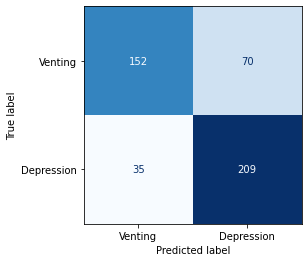

In [58]:
report(X_train,X_test,y_train,y_test,gs_pipe)
plot_confusion_matrix(gs_pipe,X_test,y_test,display_labels=['Venting', 'Depression'],colorbar=False,cmap=plt.cm.Blues)

In [59]:
# hyperparameter - can reduce the overfitting
0.8260558339298497 - 0.7746781115879828

0.05137772234186688

# Save model for testing with new data (from depression twitter)

In [60]:
# save the model
model = gs_pipe
filename = '../model/model.sav'
pickle.dump(model, open(filename, 'wb'))